<a href="https://colab.research.google.com/github/Debora101/cafe-espectroscopia/blob/main/CAFE_OFICIAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introdução


Técnicas de análise sensorial utilizam um painel de degustadores treinados para obter um grupo de características sensoriais de um produto, sendo tipicamente utilizadas na indústria de alimentos para fins de controle de qualidade, classificação e pesquisa. Um painel é consistido por um grupo de degustadores treinados que julgam amostras de produtos (com a presença ou não de repetições) com base em um conjunto de atributos, sendo os resultados tipicamente expressos numa escala numérica.

Um dos objetivos mais comuns em painéis sensoriais é a classificação das amostras de alimentos em categorias de qualidade, de acordo com a média das notas em cada atributo. Essa classificação tem fundamental importância para os produtores do alimento, visto que impacta diretamente no preço de venda e no reconhecimento do seu produto. Por isso, torna-se interessante prever a nota de qualidade de um produto com base em variáveis químicas ou de processo. Além disso, ao utilizar um painel de degustadores, torna-se importante definir apropriadamente a quantidade de amostras, de atributos avaliados e o número de degustadores. Utilizar uma quantidade elevada de amostras, atributos e degustadores pode gerar mais robustez e confiabilidade aos resultados; no entanto, aumenta o tempo requerido para execução do experimento e, consequentemente, o custo do mesmo.

#Espectroscopia
A espectroscopia é a ciência que explora como a matéria interage com a radiação eletromagnética. Esta área de estudo abrange fenômenos como reflexão, refração, espalhamento elástico, interferência e difração, além de mudanças nos níveis de energia de moléculas ou átomos. Os métodos usados em espectroscopia envolvem medir a radiação que é emitida ou absorvida por moléculas ou átomos. Estes métodos são divididos com base nas diferentes regiões do espectro eletromagnético — incluindo raios gama, raios X, ultravioleta, visível, infravermelho e radiofrequência —, cada um fornecendo informações variadas sobre a matéria em análise ou aplicações específicas. Além disso, em certos contextos, a espectroscopia pode se referir a técnicas que não utilizam radiação eletromagnética, como a espectroscopia acústica, de massas e de elétrons.

O espectro, resultado gráfico de uma técnica espectroscópica, mostra a resposta da matéria como função do comprimento de onda ou, mais comumente, da frequência. Esse registro gráfico é conhecido como espectrograma.

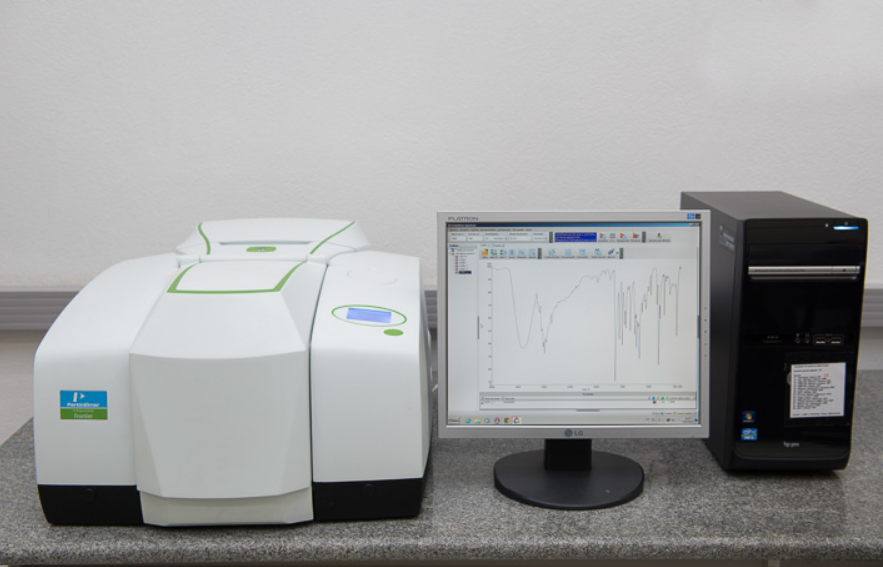

**Objetivo**:Neste estudo, nosso foco é analisar um conjunto de dados que contém amostras de café. As variáveis independentes (X) são compostas por 1798 sinais espectrais obtidos em laboratório, enquanto a variável dependente (Y) corresponde às avaliações dadas pelos degustadores de café. O desafio é lidar com a grande quantidade de variáveis X. Portanto, a meta é empregar métodos eficazes para determinar o número ideal de variáveis que permitam prever Y de forma precisa, mantendo ao mesmo tempo a facilidade de interpretação e minimizando os erros de previsão.


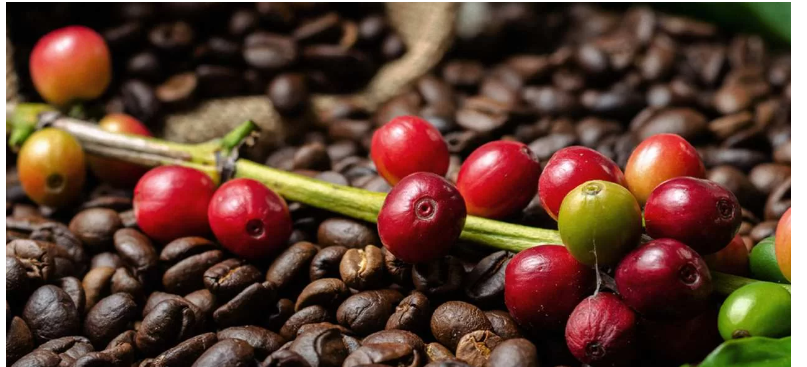

# Dados

Segue a visualização dos sinais espectrais obtidos das amostras de café.

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_excel("/content/cafelimpando.xlsx")


# Análise Exploratória

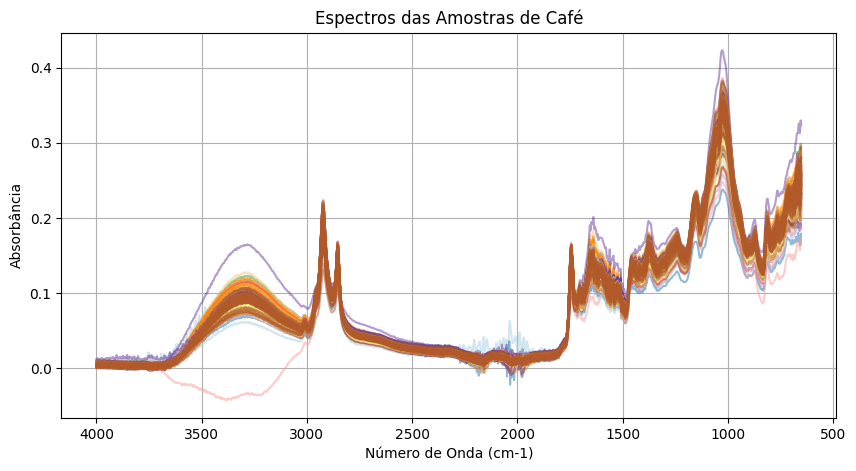

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
# Definir o número de cores
num_colors = len(df)

# Usando a paleta de cores "Paired"
colors = plt.cm.Paired(np.linspace(0, 1, num_colors))

# Criar uma nova figura
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.set_prop_cycle(color=colors)

# Para cada amostra no dataframe, plotar o espectro
for index, row in df.iterrows():
    plt.plot(row.index[1:], row.values[1:], alpha=0.5)

# Configurar o gráfico
plt.title("Espectros das Amostras de Café")
plt.xlabel("Número de Onda (cm-1)")
plt.ylabel("Absorbância")
plt.gca().invert_xaxis()
plt.grid(True)

# Mostrar o gráfico sem a legenda (devido à quantidade de amostras)
plt.show()

**Histograma**

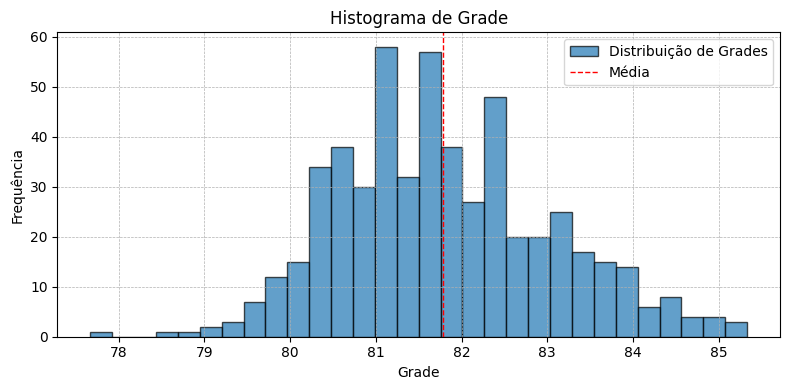

mean    81.785109
std      1.251652
min     77.666667
max     85.333333
Name: Grade, dtype: float64

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Plotando o histograma para a coluna "Grade" com a linha da média
plt.figure(figsize=(8, 4))
plt.hist(df["Grade"], bins=30, edgecolor='black', alpha=0.7, label="Distribuição de Grades")
plt.axvline(df["Grade"].mean(), color='red', linestyle='dashed', linewidth=1, label="Média")

plt.title("Histograma de Grade")
plt.xlabel("Grade")
plt.ylabel("Frequência")
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# Estatísticas descritivas solicitadas
grade_stats_selected = df["Grade"].agg(['mean', 'std', 'min', 'max'])
grade_stats_selected

**Verificando se tem valores faltantes**

In [ ]:
import pandas as pd

# Verificando a quantidade de valores faltantes para cada coluna
missing_values_reloaded = df.isnull().sum()

# Filtrando as colunas que possuem valores faltantes
missing_values_reloaded = missing_values_reloaded[missing_values_reloaded > 0]
missing_values_reloaded

Series([], dtype: int64)

**Outliers**

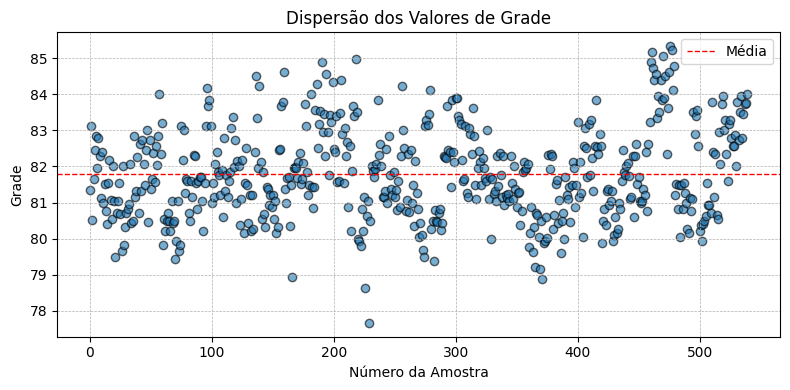

In [ ]:
# Criando um scatter plot para a variável "Grade"
plt.figure(figsize=(8, 4))
plt.scatter(df.index, df["Grade"], alpha=0.6, edgecolor="black")
plt.axhline(df["Grade"].mean(), color='red', linestyle='dashed', linewidth=1, label="Média")

# Configurações do gráfico
plt.title("Dispersão dos Valores de Grade")
plt.xlabel("Número da Amostra")
plt.ylabel("Grade")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()

**Correlação**

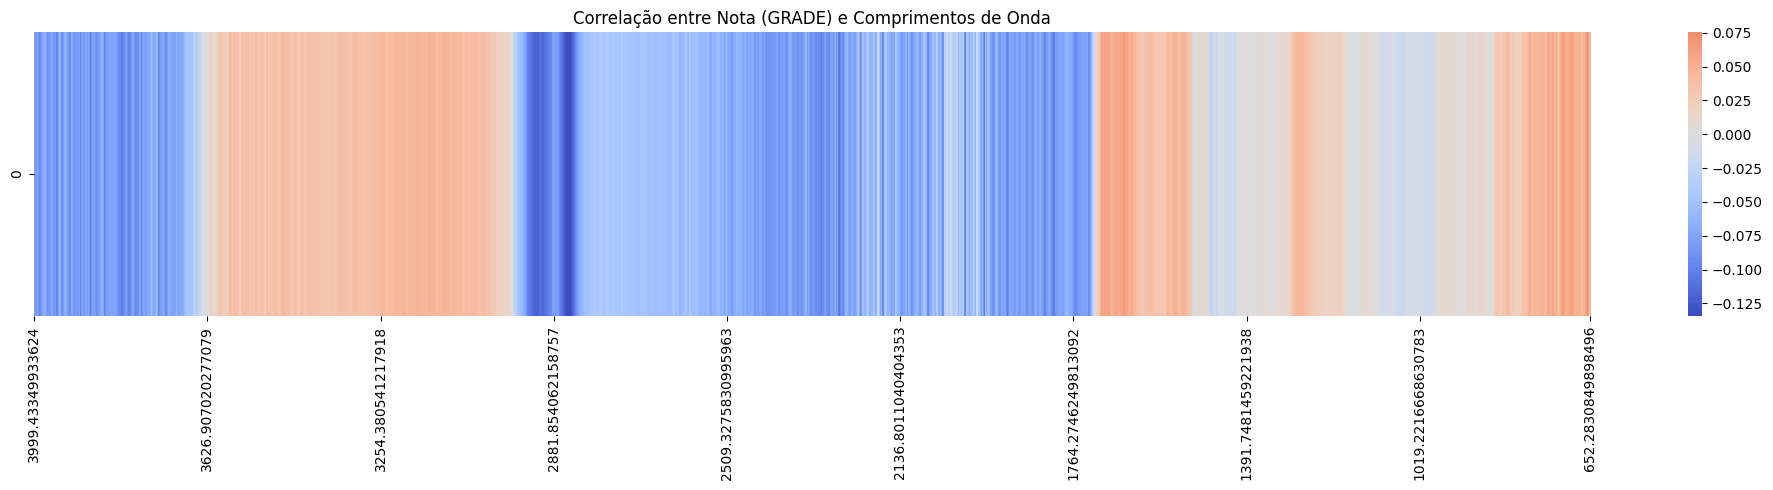

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculando a correlação entre GRADE e demais colunas
correlation = df.corrwith(df['Grade']).drop('Grade')

# Plotando o heatmap
plt.figure(figsize=(20, 5))
sns.heatmap(correlation.to_frame().T, cmap='coolwarm', center=0, annot=False, cbar=True, xticklabels=200)
plt.xticks(list(plt.xticks()[0]) + [len(correlation)-1],
           list(plt.xticks()[1]) + [correlation.index[-1]], rotation=90)
plt.title('Correlação entre Nota (GRADE) e Comprimentos de Onda')
plt.tight_layout()
plt.show()

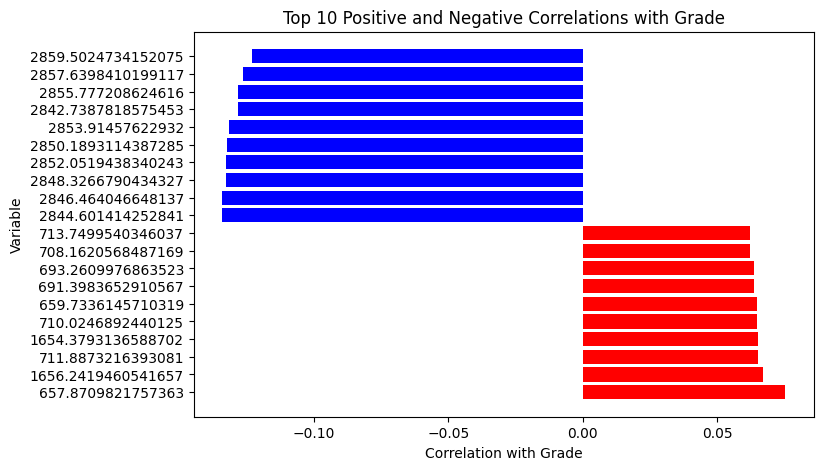

In [ ]:
# Get the top 10 positive and negative correlations
top_pos_correlations = correlation.nlargest(10)
top_neg_correlations = correlation.nsmallest(10)

# Combine them for plotting
top_correlations = pd.concat([top_pos_correlations, top_neg_correlations])

# Create a new figure
plt.figure(figsize=(8, 5))

# Plot positive correlations in red and negative correlations in blue
colors = ['red' if c > 0 else 'blue' for c in top_correlations]
plt.barh(top_correlations.index.astype(str), top_correlations.values, color=colors)

# Set labels
plt.xlabel('Correlation with Grade')
plt.ylabel('Variable')
plt.title('Top 10 Positive and Negative Correlations with Grade')

# Show the plot
plt.show()

# PLS Geral

O algoritmo PLS, que significa "Partial Least Squares" (Mínimos Quadrados Parciais), é uma técnica estatística utilizada principalmente para análise de dados com muitas variáveis. Este método é especialmente útil em situações onde as variáveis preditoras (X) são muitas e possivelmente correlacionadas, e o objetivo é prever uma ou mais variáveis de resposta (Y).

O PLS procura estabelecer relações lineares entre as variáveis X e Y, encontrando componentes latentes que explicam a variação tanto em X quanto em Y. Ao fazer isso, o PLS reduz a dimensionalidade dos dados (diminui o número de variáveis explicativas) de forma a reter as informações mais relevantes para a previsão de Y.

Iniciamos a série de testes aplicando o algoritmo PLS diretamente aos dados brutos, sem nenhum tratamento prévio ou seleção de variáveis, visando estabelecer uma base de comparação.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score

# Definindo as variáveis independentes e dependentes
x_reload = df.iloc[:, 1:-1]
y_reload = df["Grade"]

# Divisão dos dados
X_train_reload, X_test_reload, y_train_reload, y_test_reload = train_test_split(x_reload, y_reload, test_size=0.33, random_state=123)

# Função para calcular o RMSE
def compute_rmse(n_components, x_train, y_train):
    pls = PLSRegression(n_components=n_components)
    y_cv = cross_val_predict(pls, x_train, y_train, cv=10)
    return np.sqrt(mean_squared_error(y_train, y_cv))  # Aqui, calculamos a raiz quadrada do MSE para obter o RMSE

# Encontrando o número ótimo de componentes
components_range_reload = list(range(1, 21))  # Testando de 1 a 20 componentes
rmse_scores_reload = [compute_rmse(n, X_train_reload, y_train_reload) for n in components_range_reload]
optimal_components_reload = components_range_reload[np.argmin(rmse_scores_reload)]

# Treinando o modelo PLS com o número ótimo de componentes
pls_reload = PLSRegression(n_components=optimal_components_reload)
pls_reload.fit(X_train_reload, y_train_reload)

# Realizando a validação cruzada
y_cv_reload = cross_val_predict(pls_reload, X_train_reload, y_train_reload, cv=10)

# Calculando o RMSE e R2 para a validação cruzada
rmse_train_reload = np.sqrt(mean_squared_error(y_train_reload, y_cv_reload))  # Aqui, calculamos o RMSE
r2_train_reload = r2_score(y_train_reload, y_cv_reload)

# Avaliando o modelo no conjunto de teste
y_pred_test_reload = pls_reload.predict(X_test_reload)
rmse_test_reload = np.sqrt(mean_squared_error(y_test_reload, y_pred_test_reload))  # Aqui, calculamos o RMSE
r2_test_reload = r2_score(y_test_reload, y_pred_test_reload)

print(optimal_components_reload, rmse_train_reload, r2_train_reload, rmse_test_reload, r2_test_reload)


3 1.2569767904056208 0.007396253289596033 1.2138619400605641 0.022201278473036767


Usando a validação cruzada, o número ótimo de componente foi 3

Metricas de desempenho:

Para o conjunto de treinamento (validação cruzada):

Erro Quadrático Médio (RMSE): 1,25

Coeficiente de Determinação (R²): 0,00796

Para o conjunto de teste:

Erro Quadrático Médio (RMSE): 1,21

Coeficiente de Determinação (R²): 0.0222

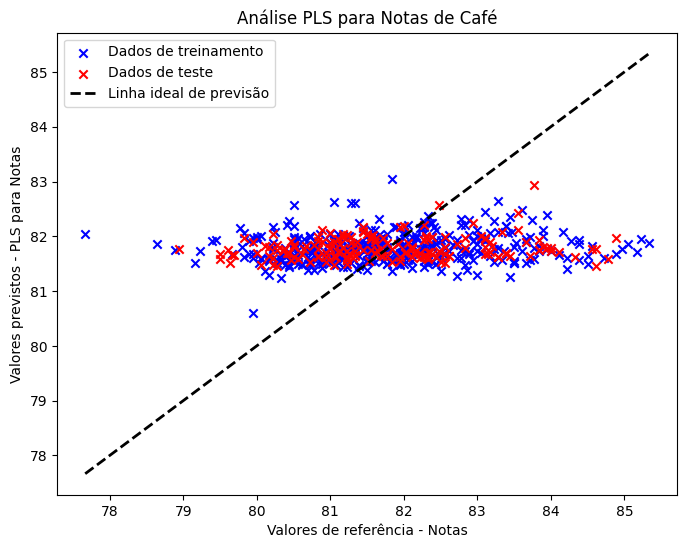

In [ ]:
# Criando o gráfico de dispersão baseado no código fornecido

plt.figure(figsize=(8, 6))

# Plotando os dados de treinamento com marcador 'x'
plt.scatter(y_train_reload, y_cv_reload, color='blue', marker='x', label='Dados de treinamento')

# Plotando os dados de teste com marcador 'x'
plt.scatter(y_test_reload, y_pred_test_reload, color='red', marker='x', label='Dados de teste')

# Plotando a linha ideal de previsão
plt.plot([y_reload.min(), y_reload.max()], [y_reload.min(), y_reload.max()], 'k--', lw=2, label='Linha ideal de previsão')

# Configurando os rótulos e o título
plt.xlabel('Valores de referência - Notas')
plt.ylabel('Valores previstos - PLS para Notas')
plt.title('Análise PLS para Notas de Café')
plt.legend()

# Mostrando o gráfico
plt.show()

Fica evidente que, no que diz respeito à capacidade de predição, nosso modelo não atingiu os resultados esperados. Diante disso, estamos explorando possíveis alternativas para aprimorá-lo.

# Mrmr com PLS

O "mRMR" é a abreviação de "Minimum Redundancy Maximum Relevance" (Mínima Redundância Máxima Relevância). É um método utilizado para a seleção de características em análises de dados, particularmente útil em campos como aprendizado de máquina e bioinformática. O principal objetivo do mRMR é selecionar um subconjunto de características que são altamente relevantes para a variável de interesse (por exemplo, a variável de saída de um modelo preditivo) enquanto mantém a redundância entre as características escolhidas ao mínimo.

 Inicialmente, aplicamos o método mRMR (Minimum Redundancy Maximum Relevance) para identificar um ranking de variáveis, selecionando aquelas com maior relevância e mínima redundância. Esta etapa nos permitiu destacar as variáveis mais significativas para nossa análise.

Posteriormente, utilizando o algoritmo PLS (Partial Least Squares), construímos um modelo inicial incorporando todas as variáveis. A partir deste ponto, adotamos uma estratégia de refinamento progressivo: removemos as variáveis uma a uma, seguindo a ordem estabelecida pelo ranking do mRMR, e a cada remoção, desenvolvemos um novo modelo PLS. Este processo iterativo de remoção e reconstrução de modelos nos permitiu avaliar o impacto de cada variável no desempenho geral do modelo.

Através dessa técnica, fomos capazes de analisar minuciosamente a contribuição individual de cada variável, permitindo-nos identificar o equilíbrio ótimo entre a simplicidade do modelo e sua precisão de predição.

In [ ]:
import pandas as pd


In [ ]:
!pip install mrmr_selection

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 3.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from mrmr import mrmr_regression

# Lendo os dados
df = pd.read_excel('cafelimpando.xlsx')

X = df.drop(columns=['Grade'])
y = df['Grade']

# Obtendo o ranking das características, relevância e redundância usando mRMR
selected_features, relevance_scores, redundancy_scores = mrmr_regression(X=X, y=y, K=1798, return_scores=True)

# Convertendo as características selecionadas em seus índices correspondentes
selected_indices = [X.columns.get_loc(feature) for feature in selected_features]

# Criando DataFrames para exibir os resultados
selected_indices_df = pd.DataFrame(selected_indices, columns=['Feature Index'])
scores_df = pd.DataFrame({
    'Feature': selected_features,
    'Relevance': [relevance_scores[feature] for feature in selected_features],
    'Redundancy': [redundancy_scores[feature] for feature in selected_features]
})

# Salvando os índices e scores em arquivos Excel
selected_indices_df.to_excel('selected_indices.xlsx', index=False)
scores_df.to_excel('relevance_redundancy_scores.xlsx', index=False)


100%|██████████| 1798/1798 [09:04<00:00,  3.31it/s]


In [ ]:
print(selected_indices_df)

In [ ]:
print(scores_df)

In [ ]:
#Como ficou em duas planilhas muito bagunçada então, separei em duas
#Selecionando as características e suas relevâncias
features_and_relevance = scores_df[['Feature', 'Relevance']]# Salvando as características e suas relevâncias em um arquivo Excel
features_and_relevance.to_excel('features_and_relevance_scores.xlsx', index=False)
# Exibindo as características e relevâncias
print(features_and_relevance)


          Feature  Relevance
0     2844.601414   9.867120
1     2015.729998   0.290141
2     2846.464047   9.859790
3     2267.185372   6.597147
4      657.870982   3.066389
...           ...        ...
1793   924.227415   0.000008
1794  1380.572352   0.000007
1795  1388.022881   0.000007
1796  1406.649205   0.000004
1797  1149.605935   0.000002

[1798 rows x 2 columns]


In [ ]:
# EU NAO POSSO RODAR ESSA CELULA DUAS VEZES, PORQUE VAI DAR ERRO, SE DER APENAS TENHO QUE COMEÇAR TUDO DE NOVO
#Função para extrair a média dos valores de redundância da série
def calculate_mean_redundancy(series):
    return series.mean()

# Aplicando a função diretamente na coluna de redundância
scores_df['Redundancy'] = scores_df['Redundancy'].apply(calculate_mean_redundancy)

# Criando um DataFrame com apenas as colunas 'Feature' e 'Redundancy'
redundancy_df = scores_df[['Feature', 'Redundancy']]

print(redundancy_df)

          Feature  Redundancy
0     2844.601414    0.320160
1     2015.729998    0.276859
2     2846.464047    0.243464
3     2267.185372    0.422868
4      657.870982    0.479849
...           ...         ...
1793   924.227415    0.002801
1794  1380.572352    0.002578
1795  1388.022881    0.002008
1796  1406.649205    0.001436
1797  1149.605935    0.001000

[1798 rows x 2 columns]


In [ ]:
redundancy_df.to_excel('redundancy_results.xlsx', index=False)


In [ ]:
#PLS COM MRMR

In [ ]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Lendo os dados novamente
df = pd.read_excel('cafelimpando.xlsx')

# Dividindo os dados em variáveis independentes (X) e dependente (y)
X = df.drop(columns=['Grade'])
y = df['Grade']

# Dividindo os dados em conjuntos de treinamento e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Lendo os índices das características a partir do arquivo Excel
selected_indices_df = pd.read_excel('selected_indices.xlsx')
selected_indices = selected_indices_df['Feature Index'].tolist()

# Criando listas para armazenar os resultados e os índices removidos
errors_train = []
r2_values_train = []
errors_test = []
r2_values_test = []
removed_indices = []

# Copiando a lista original de índices
indices_to_process = selected_indices.copy()

for k in range(len(indices_to_process), 0, -1):
    # Selecionando as características com base nos índices
    X_train_selected = X_train.iloc[:, indices_to_process]
    X_test_selected = X_test.iloc[:, indices_to_process]

    # Aplicando regressão PLS
    n_components = min(k, 5)
    pls = PLSRegression(n_components=n_components)
    pls.fit(X_train_selected, y_train)

    # Predizendo para os conjuntos de treinamento e teste
    y_train_pred = pls.predict(X_train_selected)
    y_test_pred = pls.predict(X_test_selected)

    # Calculando o erro e R^2 para os conjuntos de treinamento e teste
    error_train = mean_squared_error(y_train, y_train_pred)
    r2_train = r2_score(y_train, y_train_pred)
    error_test = mean_squared_error(y_test, y_test_pred)
    r2_test = r2_score(y_test, y_test_pred)

    # Armazenando os resultados
    errors_train.append(error_train)
    r2_values_train.append(r2_train)
    errors_test.append(error_test)
    r2_values_test.append(r2_test)

    # Removendo o índice menos importante e armazenando na lista de índices removidos
    index_to_remove = indices_to_process.pop(-1)
    removed_indices.append(index_to_remove)

# Criando um DataFrame com os resultados
results_df_train_test = pd.DataFrame({
    'Number of Features': list(range(len(X.columns), len(X.columns) - len(errors_train), -1)),
    'Removed Index': removed_indices,
    'MSE Train': errors_train,
    'R^2 Train': r2_values_train,
    'MSE Test': errors_test,
    'R^2 Test': r2_values_test
})

# Salvando o DataFrame em um arquivo Excel
results_df_train_test.to_excel("resultadospls.xlsx", index=False)

In [ ]:
print(results_df_train_test)

      Number of Features  Removed Index  MSE Train  R^2 Train  MSE Test  \
0                   1798           1530   1.365870   0.130869  1.512523   
1                   1797           1392   1.365865   0.130872  1.512558   
2                   1796           1402   1.366071   0.130741  1.512588   
3                   1795           1406   1.366239   0.130634  1.512652   
4                   1794           1651   1.366332   0.130575  1.512728   
...                  ...            ...        ...        ...       ...   
1793                   5           1794   1.502082   0.044195  1.504278   
1794                   4            930   1.524312   0.030049  1.491953   
1795                   3            619   1.544107   0.017453  1.526035   
1796                   2           1065   1.544200   0.017393  1.524153   
1797                   1            620   1.550598   0.013322  1.502660   

      R^2 Test  
0     0.019855  
1     0.019832  
2     0.019813  
3     0.019771  
4     0.019722

In [ ]:
# Convertendo os índices para os nomes das colunas
selected_feature_names = [X.columns[index] for index in selected_indices]

# Salvando os nomes das características em um arquivo Excel
selected_feature_names_df = pd.DataFrame(selected_feature_names, columns=['Feature Name'])
selected_feature_names_df.to_excel("selected_feature_names.xlsx", index=False)


In [ ]:
print(selected_feature_names_df)

      Feature Name
0      2844.601414
1      2015.729998
2      2846.464047
3      2267.185372
4       657.870982
...            ...
1793    924.227415
1794   1380.572352
1795   1388.022881
1796   1406.649205
1797   1149.605935

[1798 rows x 1 columns]


# RELIEF com PLS

O método Relief, uma técnica avançada de seleção de características, foi integralmente incorporado em nossa pesquisa para aprimorar a análise de dados de café. Esse método é conhecido por sua eficiência na identificação de variáveis significativas, distinguindo as mais relevantes em conjuntos de dados complexos.

Aplicando o Relief, realizamos uma classificação criteriosa das variáveis, estabelecendo um ranking de importância. Com base nessa classificação, adotamos uma estratégia similar à usada com o mRMR: removemos sequencialmente as variáveis, ajustando e avaliando o modelo PLS após cada exclusão. Esse processo iterativo não apenas enriqueceu nossa análise, mas também contribuiu para um modelo preditivo mais preciso e refinado, destacando a seleção de variáveis como um componente crucial na modelagem de dados em grande escala.

In [ ]:
#usando a biblioteca da internet OFICIAL

In [ ]:
!pip install sklearn_relief


In [ ]:
import numpy as np
import pandas as pd
import sklearn_relief as sr

# Definindo uma semente para a geração de números aleatórios
seed = 42
np.random.seed(seed)

# Carregando os dados
data = pd.read_excel("cafelimpando.xlsx")

# Extração das características (X) e da variável alvo (y)
X = data.drop(columns=["Grade"]).values
y = data["Grade"].values

# Usando RReliefF para selecionar as características mais importantes
# Definindo a semente para RReliefF
r = sr.RReliefF(random_state=seed)
r.fit(X, y)

# Suponho que 'w_' é o atributo que fornece a importância das características
feature_importances_relief = r.w_

# Ordenando as características por importância
sorted_indices_relief = feature_importances_relief.argsort()[::-1]

# Salvando as características ordenadas em um arquivo
features = data.columns.drop("Grade")
ranking_dff = pd.DataFrame({
    'feature': features[sorted_indices_relief],
    'importance': feature_importances_relief[sorted_indices_relief]
})
ranking_dff.to_excel("feature_ranking_reliefF.xlsx", index=False)

print("Ranking das características salvo em 'feature_ranking_reliefF.xlsx'")


Ranking das características salvo em 'feature_ranking_reliefF.xlsx'


In [ ]:
print(ranking_dff)


          feature  importance
0      659.733615    0.002150
1       656.00835    0.001821
2      657.870982    0.001490
3      670.909409    0.001046
4      706.299424    0.000852
...           ...         ...
1793   2025.04316   -0.001438
1794  2039.944219   -0.001512
1795  2023.180528   -0.001577
1796  2028.768425   -0.001636
1797  2026.905793   -0.001742

[1798 rows x 2 columns]


In [ ]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Usando o ranking_df para obter os nomes das características em ordem de importância
sorted_features = ranking_dff["feature"].values

# Dividindo os dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(data[sorted_features], y, test_size=0.3, random_state=0)

# Listas para armazenar os resultados de teste e treinamento
test_errors = []
test_r2_values = []
train_errors = []
train_r2_values = []

# Processo de seleção para trás
for i in range(X_train.shape[1], 0, -1):
    selected_features = sorted_features[:i]
    X_train_selected = X_train[selected_features]
    X_test_selected = X_test[selected_features]

    # Definindo o número de componentes dinamicamente
    n_components = min(5, i)
    pls = PLSRegression(n_components=n_components)

    # Treinando o PLS
    pls.fit(X_train_selected, y_train)

    # Predição para o conjunto de teste e cálculo das métricas
    y_test_pred = pls.predict(X_test_selected)
    test_error = mean_squared_error(y_test, y_test_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    # Predição para o conjunto de treinamento e cálculo das métricas
    y_train_pred = pls.predict(X_train_selected)
    train_error = mean_squared_error(y_train, y_train_pred)
    train_r2 = r2_score(y_train, y_train_pred)

    # Salvando os resultados
    test_errors.append(test_error)
    test_r2_values.append(test_r2)
    train_errors.append(train_error)
    train_r2_values.append(train_r2)

    print(f"With {i} features (Excluding '{sorted_features[i-1]}') and {n_components} components: ")
    print(f"Train Error = {train_error:.4f}, Train R^2 = {train_r2:.4f}")
    print(f"Test Error = {test_error:.4f}, Test R^2 = {test_r2:.4f}\n")


Streaming output truncated to the last 5000 lines.
With 1250 features (Excluding '3965.9061162209155') and 5 components: 
Train Error = 1.2398, Train R^2 = 0.1716
Test Error = 1.5915, Test R^2 = 0.0593

With 1249 features (Excluding '3878.3623936420126') and 5 components: 
Train Error = 1.2404, Train R^2 = 0.1712
Test Error = 1.5914, Test R^2 = 0.0593

With 1248 features (Excluding '1663.692475635348') and 5 components: 
Train Error = 1.2410, Train R^2 = 0.1708
Test Error = 1.5921, Test R^2 = 0.0589

With 1247 features (Excluding '2997.337270667097') and 5 components: 
Train Error = 1.2410, Train R^2 = 0.1708
Test Error = 1.5924, Test R^2 = 0.0587

With 1246 features (Excluding '2805.486133951629') and 5 components: 
Train Error = 1.2414, Train R^2 = 0.1706
Test Error = 1.5918, Test R^2 = 0.0591

With 1245 features (Excluding '2118.1747800874773') and 5 components: 
Train Error = 1.2415, Train R^2 = 0.1705
Test Error = 1.5916, Test R^2 = 0.0592

With 1244 features (Excluding '2736.5687

In [ ]:
import pandas as pd

# Supondo que você já tenha executado o código anterior e tem as listas:
# train_errors, train_r2_values, test_errors, e test_r2_values

# Criando um DataFrame para os resultados
results_df = pd.DataFrame({
    'Number of Features': list(range(X_train.shape[1], 0, -1)),
    'Excluded Feature': sorted_features[X_train.shape[1]-1::-1],
    'Number of PLS Components': [min(5, i) for i in range(X_train.shape[1], 0, -1)],
    'Train Error': train_errors,
    'Train R^2': train_r2_values,
    'Test Error': test_errors,
    'Test R^2': test_r2_values
})

# Salvando os resultados em um arquivo Excel
results_df.to_excel("pls_results.xlsx", index=False)


In [ ]:
from google.colab import files

files.download('pls_results.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# PLS coef com PLS modelo


Em uma etapa adicional deste estudo, exploramos uma abordagem focada nos coeficientes gerados pelo próprio algoritmo PLS. Utilizamos os coeficientes para estabelecer um ranking de importância das variáveis, uma técnica que permitiu uma análise mais intrínseca do modelo.

Este processo começou com a classificação das variáveis com base nos coeficientes do PLS, refletindo a influência de cada uma na previsão. Em seguida, adotamos uma abordagem progressiva: removemos as variáveis uma após a outra, de acordo com o ranking de coeficientes, e recalculamos o modelo PLS a cada remoção.

Essa metodologia permitiu uma avaliação detalhada do impacto de cada variável individual no desempenho do modelo. Ao analisar os efeitos da remoção progressiva, pudemos refinar ainda mais o modelo, alcançando um equilíbrio ótimo entre simplicidade e eficácia. A utilização dos coeficientes do PLS como guia para a seleção de variáveis demonstrou ser uma estratégia valiosa para aprimorar a precisão e a eficiência do modelo preditivo em nosso estudo de amostras de café.

In [ ]:
#Achando os coeficiente e também roda o PLS de acordo com coeficiente (faz tudo junto no codigo)

In [ ]:
#PLS coeficientes e PLS MODELO
import pandas as pd
import numpy as np
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Carregar os dados
data = pd.read_excel("/content/cafelimpando.xlsx")
X = data.drop(columns=["Grade"])
y = data["Grade"]
column_names = X.columns

# Preparar os dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=column_names)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=column_names)

# Determinar o ranking das características com PLS
def feature_ranking_by_coefficients(original_columns, model_coefficients):
    sorted_indices = abs(model_coefficients).flatten().argsort()[::-1]
    ranked_features = original_columns[sorted_indices].tolist()
    coefficients = model_coefficients.flatten()[sorted_indices]
    return ranked_features, coefficients, sorted_indices

n_components = min(X_train.shape[1], 4)
pls = PLSRegression(n_components=n_components)
pls.fit(X_train_scaled, y_train)
ranked_features, coefficients, sorted_indices = feature_ranking_by_coefficients(column_names, pls.coef_)

# Avaliação iterativa do PLS com remoção de características
rmse_train = []
r2_values_train = []
rmse_test = []
r2_values_test = []
removed_features = []
removed_indices = []

features_to_process = column_names.tolist()

for i in range(len(ranked_features)):
    n_components_dynamic = max(min(len(features_to_process), 4), 1)
    pls = PLSRegression(n_components=n_components_dynamic)
    pls.fit(X_train_scaled[features_to_process], y_train)
    y_train_pred = pls.predict(X_train_scaled[features_to_process])
    y_test_pred = pls.predict(X_test_scaled[features_to_process])
    rmse_train.append(np.sqrt(mean_squared_error(y_train, y_train_pred)))
    r2_values_train.append(r2_score(y_train, y_train_pred))
    rmse_test.append(np.sqrt(mean_squared_error(y_test, y_test_pred)))
    r2_values_test.append(r2_score(y_test, y_test_pred))

    # Próxima característica a ser removida
    feature_to_remove = ranked_features[-(i+1)]
    index_to_remove = sorted_indices[-(i+1)]
    removed_features.append(feature_to_remove)
    removed_indices.append(index_to_remove)
    features_to_process.remove(feature_to_remove)

# Criando um DataFrame com os resultados
performance_df = pd.DataFrame({
    'Number of Features': list(range(len(X.columns), len(X.columns) - len(rmse_train), -1)),
    'Removed Feature': removed_features,
    'Removed Index': removed_indices,
    'RMSE Train': rmse_train,
    'R^2 Train': r2_values_train,
    'RMSE Test': rmse_test,
    'R^2 Test': r2_values_test
})

coefficients_df = pd.DataFrame({
    'Feature': ranked_features,
    'Coefficient': coefficients,
    'Feature Index': sorted_indices
})


In [ ]:
print(coefficients_df)

          Feature  Coefficient  Feature Index
0     1704.670388     0.008398           1232
1     1702.807756     0.008232           1233
2     2844.601414    -0.007970            620
3     2149.839531    -0.007883            993
4     1700.945124     0.007878           1234
...           ...          ...            ...
1793  1358.220763    -0.000006           1418
1794  3820.620789     0.000005             96
1795  3924.928204    -0.000005             40
1796  2555.893393     0.000004            775
1797  2080.922132     0.000003           1030

[1798 rows x 3 columns]


In [ ]:
from google.colab import files

# Salvar os DataFrames como arquivos Excel
performance_df.to_excel("performance.xlsx", index=False)
coefficients_df.to_excel("coefficients.xlsx", index=False)

# Fazer o download dos arquivos
files.download("performance.xlsx")
files.download("coefficients.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# XGboost com os PLS coeficientes
O XGBoost, abreviação de eXtreme Gradient Boosting, é uma técnica avançada de aprendizado de máquina conhecida por sua alta eficiência, flexibilidade e capacidade de lidar com uma ampla gama de problemas de modelagem preditiva. Caracteriza-se pelo uso de algoritmos de "boosting", que combinam múltiplos modelos fracos para criar um modelo forte e altamente preditivo.

Neste estudo, integramos o XGBoost ao utilizar o ranking de variáveis estabelecido pelos coeficientes do PLS. A estratégia adotada envolveu a construção de modelos XGBoost iterativos, modificando o conjunto de variáveis em cada iteração com base no ranking. Iniciamos com todas as variáveis classificadas pelo PLS e, em seguida, removemos progressivamente cada uma delas, recalculando o modelo XGBoost a cada etapa.

Essa metodologia proporcionou uma análise comparativa singular, permitindo-nos observar como o desempenho do XGBoost se alterava com a variação do conjunto de variáveis. Ao empregar o XGBoost em conjunto com o ranking gerado pelo PLS, pudemos avaliar a relevância de cada variável dentro de um modelo de aprendizado de máquina sofisticado, contribuindo significativamente para a compreensão e otimização do nosso modelo preditivo no contexto das amostras de café.

In [ ]:
#XGBOOST PLS COEFI

In [ ]:
import xgboost as xgb

# Usando o ranking das características a partir da execução anterior do PLS
selected_indices = sorted_indices

# Configuração otimizada do XGBoost (pode ser necessário ajustar os parâmetros conforme sua análise anterior)
params = {
    'objective': 'reg:squarederror',
    'learning_rate': 0.05,
    'max_depth': 4,
    'n_estimators': 200,
    'gamma': 1.0,
    'colsample_bytree': 0.4,
    'subsample': 1.0,
    'reg_lambda': 100.0,
    'n_jobs': -1
}

# Listas para armazenar os resultados
errors_train = []
r2_values_train = []
errors_val = []
r2_values_val = []

# Dividindo os dados em conjuntos de treinamento e validação (note que já fizemos isso anteriormente, então esta etapa é opcional)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Quantidade de recursos a serem removidos a cada iteração
step = 10

while len(selected_indices) > step:
    X_train_selected = X_train.iloc[:, selected_indices[:len(selected_indices)-step]]
    X_val_selected = X_val.iloc[:, selected_indices[:len(selected_indices)-step]]

    model = xgb.XGBRegressor(**params)
    model.fit(X_train_selected, y_train)

    y_train_pred = model.predict(X_train_selected)
    y_val_pred = model.predict(X_val_selected)

    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    r2_train_value = r2_score(y_train, y_train_pred)
    rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))
    r2_val_value = r2_score(y_val, y_val_pred)

    errors_train.append(rmse_train)
    r2_values_train.append(r2_train_value)
    errors_val.append(rmse_val)
    r2_values_val.append(r2_val_value)

    # Removendo recursos
    selected_indices = selected_indices[:-step]

results_df_xgboost = pd.DataFrame({
    'Number of Features': list(range(len(X.columns), len(X.columns) - len(errors_train)*step, -step)),
    'RMSE Train': errors_train,
    'R^2 Train': r2_values_train,
    'RMSE Validation': errors_val,
    'R^2 Validation': r2_values_val
})

# Salvando os resultados em um arquivo Excel
results_df_xgboost.to_excel("resultados_xgboost_PLS.xlsx", index=False)


In [ ]:
print(results_df_xgboost)

     Number of Features  RMSE Train  R^2 Train  RMSE Validation  \
0                  1798    0.683151   0.697456         1.273481   
1                  1788    0.671112   0.708025         1.270724   
2                  1778    0.683051   0.697544         1.272224   
3                  1768    0.681501   0.698916         1.285993   
4                  1758    0.685631   0.695255         1.271116   
..                  ...         ...        ...              ...   
174                  58    0.991042   0.363293         1.268655   
175                  48    1.033068   0.308148         1.313819   
176                  38    1.051283   0.283535         1.304193   
177                  28    1.075014   0.250825         1.311758   
178                  18    1.112260   0.198012         1.321731   

     R^2 Validation  
0          0.013753  
1          0.018018  
2          0.015698  
3         -0.005722  
4          0.017413  
..              ...  
174        0.021213  
175       -0.049716

#  XGBoost com ranking mRMR


Utilizando o ranking gerado pelo método mRMR, também aplicamos o XGBoost, uma técnica de aprendizado de máquina reconhecida por sua eficiência e precisão. Com base na seleção de variáveis do mRMR, construímos modelos XGBoost iterativos, ajustando o conjunto de variáveis em cada iteração. Este processo permitiu avaliar o impacto de cada variável, conforme identificado pelo mRMR, dentro do contexto do modelo XGBoost, oferecendo insights valiosos para a otimização do nosso modelo preditivo em relação às amostras de café.




In [ ]:
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Lendo os dados
df = pd.read_excel('cafelimpando.xlsx')

# Dividindo os dados em variáveis independentes (X) e dependente (y)
X = df.drop(columns=['Grade'])
y = df['Grade']

# Divisão dos dados em conjuntos de treinamento, validação e teste
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

# Lendo os índices das características a partir do arquivo Excel
selected_indices_df = pd.read_excel('selected_indices.xlsx')
selected_indices = selected_indices_df['Feature Index'].tolist()

# Configuração otimizada do XGBoost
params = {
    'objective': 'reg:squarederror',
    'learning_rate': 0.05,
    'max_depth': 4,
    'n_estimators': 200,
    'gamma': 1.0,
    'colsample_bytree': 0.4,
    'subsample': 1.0,
    'reg_lambda': 100.0,
    'n_jobs': -1
}

# Listas para armazenar os resultados
errors_train = []
r2_values_train = []
errors_val = []
r2_values_val = []

# Quantidade de recursos a serem removidos a cada iteração
step = 10

while len(selected_indices) > step:
    X_train_selected = X_train.iloc[:, selected_indices[:len(selected_indices)-step]]
    X_val_selected = X_val.iloc[:, selected_indices[:len(selected_indices)-step]]

    model = xgb.XGBRegressor(**params)
    model.fit(X_train_selected, y_train)

    y_train_pred = model.predict(X_train_selected)
    y_val_pred = model.predict(X_val_selected)

    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    r2_train_value = r2_score(y_train, y_train_pred)
    rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))
    r2_val_value = r2_score(y_val, y_val_pred)

    errors_train.append(rmse_train)
    r2_values_train.append(r2_train_value)
    errors_val.append(rmse_val)
    r2_values_val.append(r2_val_value)

    # Removendo recursos
    selected_indices = selected_indices[:-step]

results_df_xgboost = pd.DataFrame({
    'Number of Features': list(range(len(X.columns), len(X.columns) - len(errors_train)*step, -step)),
    'RMSE Train': errors_train,
    'R^2 Train': r2_values_train,
    'RMSE Validation': errors_val,
    'R^2 Validation': r2_values_val
})

# Salvando os resultados em um arquivo Excel
results_df_xgboost.to_excel("resultados_xgboost.xlsx", index=False)

In [ ]:
print(results_df_xgboost)

#  XGBoost com ranking Relief

Após a seleção de variáveis feita pelo método Relief, realizamos uma abordagem similar utilizando o XGBoost. Criamos modelos XGBoost iterativos, ajustando as variáveis selecionadas pelo Relief em cada etapa. Este procedimento permitiu uma análise precisa do impacto de cada variável, conforme destacado pelo Relief, no desempenho do modelo XGBoost, contribuindo assim para minimizar o erro na previsão das amostras de café.

In [ ]:
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Lendo os dados
df = pd.read_excel('cafelimpando.xlsx')

# Dividindo os dados em variáveis independentes (X) e dependente (y)
X = df.drop(columns=['Grade'])
y = df['Grade']

# Divisão dos dados em conjuntos de treinamento e validação
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Lendo o ranking das características a partir do arquivo Excel (ReliefF)
ranking_df = pd.read_excel('feature_ranking_reliefF.xlsx')
selected_indices = ranking_df['Feature Index'].tolist()

# Configuração otimizada do XGBoost (pode ser necessário ajustar os parâmetros conforme sua análise anterior)
params = {
    'objective': 'reg:squarederror',
    'learning_rate': 0.05,
    'max_depth': 4,
    'n_estimators': 200,
    'gamma': 1.0,
    'colsample_bytree': 0.4,
    'subsample': 1.0,
    'reg_lambda': 100.0,
    'n_jobs': -1
}

# Listas para armazenar os resultados
errors_train = []
r2_values_train = []
errors_val = []
r2_values_val = []

# Quantidade de recursos a serem removidos a cada iteração
step = 10

while len(selected_indices) > step:
    X_train_selected = X_train.iloc[:, selected_indices[:len(selected_indices)-step]]
    X_val_selected = X_val.iloc[:, selected_indices[:len(selected_indices)-step]]

    model = xgb.XGBRegressor(**params)
    model.fit(X_train_selected, y_train)

    y_train_pred = model.predict(X_train_selected)
    y_val_pred = model.predict(X_val_selected)

    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    r2_train_value = r2_score(y_train, y_train_pred)
    rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))
    r2_val_value = r2_score(y_val, y_val_pred)

    errors_train.append(rmse_train)
    r2_values_train.append(r2_train_value)
    errors_val.append(rmse_val)
    r2_values_val.append(r2_val_value)

    # Removendo recursos
    selected_indices = selected_indices[:-step]

results_df_xgboost = pd.DataFrame({
    'Number of Features': list(range(len(X.columns), len(X.columns) - len(errors_train)*step, -step)),
    'RMSE Train': errors_train,
    'R^2 Train': r2_values_train,
    'RMSE Validation': errors_val,
    'R^2 Validation': r2_values_val
})

# Salvando os resultados em um arquivo Excel
results_df_xgboost.to_excel("resultados_xgboost_reliefF.xlsx", index=False)


In [ ]:
print(results_df_xgboost)

# Conclusão
O trabalho em questão está em uma fase dinâmica de desenvolvimento, onde continuaremos a aperfeiçoar e refinar as metodologias utilizadas. Planejamos explorar e testar novas abordagens e técnicas analíticas, com o objetivo de aprimorar ainda mais a precisão e eficácia dos modelos preditivos. Após esta fase de investigação e otimização, o estudo estará pronto para ser publicado, contribuindo com novos insights e metodologias no campo da análise de dados de café.